question(2):


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:120: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


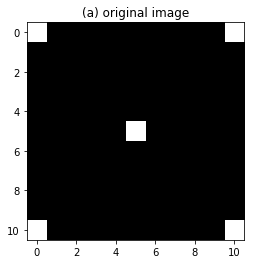

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:125: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


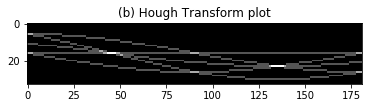

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:130: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


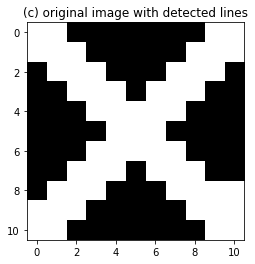

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:135: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


question(3):


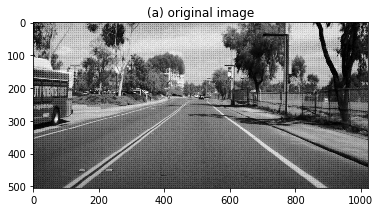

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:107: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


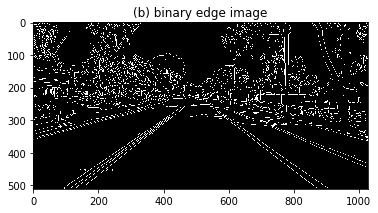

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:150: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


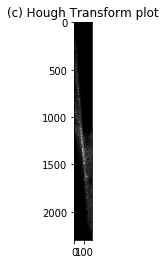

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:155: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


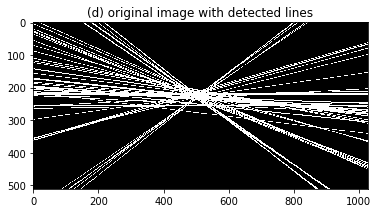

question(4):


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:164: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


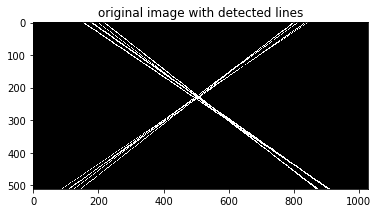

In [4]:
import numpy as np
from scipy.misc import *
import matplotlib.pyplot as plt
import math
from scipy import signal

def Hough_transform(img):
    n1,n2=img.shape
    D=round(math.sqrt(n1**2+n2**2))
    A=np.zeros((2*D+1,181),dtype=np.uint8)
    for i in range (n1):
        for j in range (n2):
            if img[i,j]!=0:
                for theta in range (-90,91):
                    rho=round(i*math.cos((theta*math.pi)/180)+j*math.sin((theta*math.pi)/180))
                    A[rho+D,theta+90]+=1
    return A

def thresholding_naive(img, HT_img):
    s1,s2=HT_img.shape
    n1,n2=img.shape
    D=round(math.sqrt(n1**2+n2**2))
    xy_plane=np.zeros((n1,n2),dtype=np.uint8)
    threshold=0.75*np.max(HT_img)
    for i in range (s1):
        for j in range (s2):
            if HT_img[i,j]>threshold:
                rho=i-D
                theta=j-90
                for y in range (n1):
                    for x in range(n2):
                        a=math.ceil(x*math.sin((theta*math.pi)/180)+y*math.cos((theta*math.pi)/180))
                        b=a-1
                        if a==rho or b==rho:
                            xy_plane[y,x]=255
    return xy_plane


def thresholding(img, HT_img):
    s1,s2=HT_img.shape
    n1,n2=img.shape
    D=round(math.sqrt(n1**2+n2**2))
    xy_plane=np.zeros((n1,n2),dtype=np.uint8)
    threshold=0.75*np.max(HT_img)
    for j in range (s2):
        for i in range (s1):
            if HT_img[i,j]>threshold:
                rho=i-D
                theta=j-90
                if -45<theta<-30 or 30<theta<45:
                    for y in range (n1):
                        for x in range(n2):
                            a=math.ceil(x*math.sin((theta*math.pi)/180)+y*math.cos((theta*math.pi)/180))
                            b=a-1
                            if a==rho or b==rho:
                                xy_plane[y,x]=255
    return xy_plane

#canny process:::::

def rgb2gray(rgb):
    grayimg = np.mean(rgb, axis=2)
    return grayimg.astype(np.uint8)

def canny_Smooth(img):
    kernel = np.array([[2, 4, 5, 4, 2], [4, 9, 12, 9, 4], [5, 12, 15, 12, 5], [4, 9, 12, 9, 4], [2, 4, 5, 4, 2]]) / 159
    return signal.convolve2d(img, kernel, boundary="symm")
def canny_Gradients(img):
    xKernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    yKernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    Gx = signal.convolve2d(img, xKernel, boundary="symm")
    Gy = signal.convolve2d(img, yKernel, boundary="symm")
    G = np.sqrt(np.power(Gx, 2) + np.power(Gy, 2))
    Gtheta, gmax = np.arctan2(Gx, Gy), G.max()
    return G * 255 / gmax, Gtheta
def canny_NMS(G, Gtheta):
    table = np.array([[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]], dtype=np.int16)
    Gtheta[Gtheta < 0] = Gtheta[Gtheta < 0] + 2 * math.pi
    gNMS = np.zeros(G.shape, dtype=np.uint8)
    for i in range(1, G.shape[0] - 1):
        #print("In line:", i)
        for j in range(1, G.shape[1] - 1):
            key = int(round(Gtheta[i, j] * 4 / math.pi)) % 8
            if math.fabs(G[i, j] - max(G[i, j], G[i + table[key, 0], j + table[key, 1]], \
                                       G[i - table[key, 0], j - table[key, 1]])) < 1e-5:
                gNMS[i, j] = G[i, j]
    return gNMS
def canny_Threshold(img, te):
    img[img < te] = 0
    img[img >= te] = 255
    return img

#Canny Edge Detection Function
def canny_edge(img, te):
    img_smooth = canny_Smooth(img)
    #imsave("geisel_smooth.jpg", img_smooth)
    #plt.subplot(2, 2, 1)
    #plt.imshow(img_smooth, cmap="gray")
    G, Gt = canny_Gradients(img_smooth)
    #imsave("geisel_G.jpg", G)
    #plt.subplot(2, 2, 2)
    #plt.imshow(G, cmap="gray")
    img_NMS = canny_NMS(G, Gt)
    #imsave("geisel_NMS.jpg", img_NMS)
    #plt.subplot(2, 2, 3)
    #plt.imshow(img_NMS, cmap="gray")
    detected_img = canny_Threshold(img_NMS, te)
    imsave("canny.png", detected_img)
    #plt.subplot(2, 2, 4)
    plt.imshow(detected_img, cmap="gray")
    return detected_img



#question(2)
print('question(2):')
pic_test=np.zeros((11,11))
pic_test[0,0]=pic_test[0,10]=pic_test[10,0]=pic_test[10,10]=pic_test[5,5]=255
plt.imshow(pic_test, cmap='gray')
plt.title('(a) original image')
imsave('pic_test.png',pic_test)
plt.show()
HT_test=Hough_transform(pic_test)
plt.imshow(HT_test, cmap='gray')
plt.title('(b) Hough Transform plot')
imsave('HT_test.png',HT_test)
plt.show()
threshold_test=thresholding(pic_test, HT_test)
plt.imshow(threshold_test, cmap='gray')
plt.title('(c) original image with detected lines')
imsave('threshold_test.png',threshold_test)
plt.show()
                
#question(3)
print('question(3):')
img=imread("lane.png")
plt.imshow(img, cmap='gray')
plt.title('(a) original image')
plt.show()

img_gray = rgb2gray(img)
plt.imshow(img_gray, cmap="gray")
canny_edge(img_gray, 40)
plt.title('(b) binary edge image')
plt.show()

pic_canny=canny_edge(img_gray, 40)
HT_canny_naive=Hough_transform(pic_canny)
plt.imshow(HT_canny_naive, cmap='gray')
plt.title('(c) Hough Transform plot')
imsave('HT_canny_naive.png',HT_canny_naive)
plt.show()
threshold_canny_naive=thresholding_naive(pic_canny, HT_canny_naive)
plt.imshow(threshold_canny_naive, cmap='gray')
plt.title('(d) original image with detected lines')
imsave('threshold_canny_naive.png',threshold_canny_naive)
plt.show()

#question(4)
print('question(4):')
HT_canny=Hough_transform(pic_canny)
threshold_canny=thresholding(pic_canny, HT_canny)
plt.imshow(threshold_canny, cmap='gray')
plt.title('original image with detected lines')
imsave('threshold_canny.png',threshold_canny)
plt.show()